<a href="https://colab.research.google.com/github/samarthnayak04/CnnClassifier/blob/main/cat_dog_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install tensorflow_datasets

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import cv2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential



In [6]:
#load the dataset
dataset,info=tfds.load('cats_vs_dogs',with_info=True,as_supervised=True)
class_names=info.features['label'].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.XQI6L8_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [7]:
class_names=info.features['label'].names
class_names

['cat', 'dog']

In [8]:
for i,example in enumerate(dataset['train']):
  image,label=example
  save_dir='./cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir,exist_ok=True)
  filename=save_dir + "/"+"{}_{}.jpg".format(class_names[label],i)
  tf.keras.preprocessing.image.save_img(filename,image.numpy())

In [9]:
print(filename)


./cats_vs_dogs/train/cat/cat_23261.jpg


In [10]:
img1=cv2.imread('/content/cats_vs_dogs/train/cat/cat_100.jpg')
img2=cv2.imread('/content/cats_vs_dogs/train/dog/dog_0.jpg')

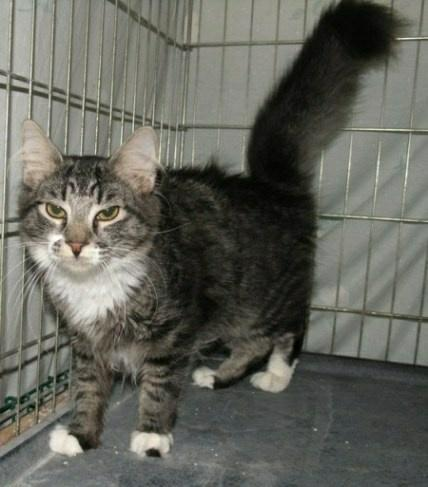

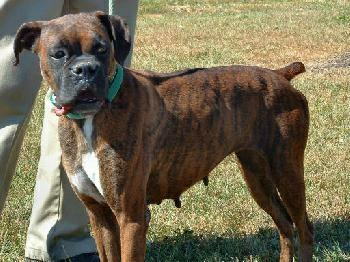

In [11]:
from google.colab.patches import cv2_imshow
cv2_imshow(img1)
cv2_imshow(img2)

In [12]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

In [13]:
print(datagen)

In [14]:
train_generator = datagen.flow_from_directory(
    '/content/cats_vs_dogs/train', target_size=(150, 150), batch_size=32, class_mode='binary', subset='training')

Found 18611 images belonging to 2 classes.


In [15]:
validation_generator = datagen.flow_from_directory(
    '/content/cats_vs_dogs/train', target_size=(150, 150), batch_size=32, class_mode='binary', subset='validation')

Found 4651 images belonging to 2 classes.


In [16]:
#define the model
model=Sequential()
model


<Sequential name=sequential, built=False>

In [17]:
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=model.fit(train_generator,epochs=10,validation_data=validation_generator,callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 168s 263ms/step - accuracy: 0.6164 - loss: 2.9916 - val_accuracy: 0.6132 - val_loss: 0.8268
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 144s 247ms/step - accuracy: 0.7181 - loss: 0.5588 - val_accuracy: 0.5450 - val_loss: 0.7365
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 144s 247ms/step - accuracy: 0.7539 - loss: 0.5116 - val_accuracy: 0.7084 - val_loss: 0.5509
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 144s 248ms/step - accuracy: 0.7716 - loss: 0.4747 - val_accuracy: 0.7379 - val_loss: 0.5383
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 142s 245ms/step - accuracy: 0.7867 - loss: 0.4575 - val_accuracy: 0.7022 - val_loss: 0.5747
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 144s 246ms/step - accuracy: 0.7946 - loss: 0.4382 - val_accuracy: 0.7807 - val_loss: 0.4974
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 162s 278ms/step - accuracy: 0.8109 - loss: 0.4194 - val_accuracy: 0.8058 - val_loss: 0.4694
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 146s 250ms/step - accuracy: 0.8113 -

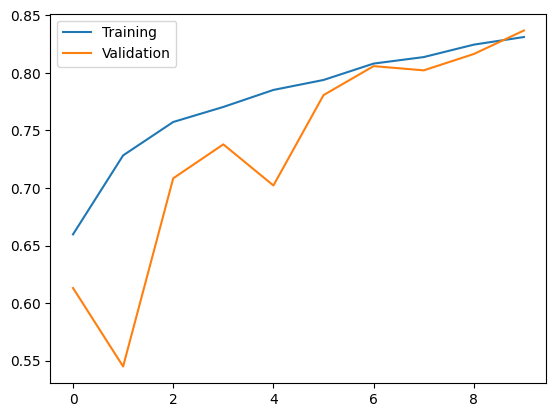

In [20]:
history.history
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend(['Training','Validation'])
plt.show()


In [21]:
model.save('cats_vs_dogs.h5')

In [22]:
model_load=tf.keras.models.load_model('cats_vs_dogs.h5')

In [23]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
from PIL import Image


img_url = "https://th.bing.com/th/id/OIP.GkJ22eV9EN4902Jp1gb08wHaFI?rs=1&pid=ImgDetMain"
img = Image.open(requests.get(img_url, stream=True).raw)

# Resize the image using a valid resampling filter, such as Image.Resampling.NEAREST
# The target size should be a tuple (width, height). Here target size is (150, 150)
img = img.resize((150, 150), Image.Resampling.NEAREST)

image_array = image.img_to_array(img)
img = np.expand_dims(image_array, axis=0)

img = img / 255

prediction = model.predict(img)
TH = 0.5
prediction = int(prediction[0][0] > TH)
classes = {v: k for k, v in train_generator.class_indices.items()}
classes[prediction]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


'cat'

In [24]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image
from PIL import Image


img_url = "https://goofytails.com/cdn/shop/files/french_bulldog_dog_breed_2000x.jpg?v=1700817521"
img = Image.open(requests.get(img_url, stream=True).raw)

# Resize the image using a valid resampling filter, such as Image.Resampling.NEAREST
# The target size should be a tuple (width, height). Here target size is (150, 150)
img = img.resize((150, 150), Image.Resampling.NEAREST)

image_array = image.img_to_array(img)
img = np.expand_dims(image_array, axis=0)

img = img / 255

prediction = model.predict(img)
TH = 0.5
prediction = int(prediction[0][0] > TH)
classes = {v: k for k, v in train_generator.class_indices.items()}
classes[prediction]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'dog'